In [1]:
import sys
sys.path.append('../../')
import cresthh
from cresthh import anuga
from osgeo import gdal
from glob import glob
from affine import Affine
import geopandas as gpd
from pyproj import Proj, CRS, transform


%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

In [3]:
myProj = Proj("+proj=utm +zone=15, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Gauge 1 (082500)

In [2]:
coupledSplotter= anuga.SWW_plotter('Aug_Sep_coupled.sww')
nonCoupledSplotter= anuga.SWW_plotter('Aug_Sep_nocoupled.sww')

Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot


In [6]:
xc = coupledSplotter.xc + coupledSplotter.xllcorner
yc = coupledSplotter.yc + coupledSplotter.yllcorner
gauge1_loc= (-95.43666, 30.11085)
gauge1_utm= myProj(gauge1_loc[0],gauge1_loc[1])
gauge1_iloc= np.argmin( (xc-gauge1_utm[0])**2 + (yc-gauge1_utm[1])**2 )

In [10]:
dr= pd.date_range('20170801', '20170901', freq='120S')
df= pd.DataFrame(index=dr)

In [11]:
OBS= pd.read_csv('/home/ZhiLi/CRESTHH/data/streamGauge/08068500.txt', delimiter='\t',
                 names=['USGS','ID','date','TZ','Q',' ','H',' '], converters={'date':pd.to_datetime}).set_index('date')
OBS.index= OBS.index.tz_localize('US/Central').tz_convert('UTC').tz_localize(None)
obs= OBS.resample('120S', label='right').mean().interpolate()
df['sim_H_couple']= coupledSplotter.stage[:,gauge1_iloc]
df['sim_V_couple']= coupledSplotter.speed[:,gauge1_iloc]
df['sim_H_nocouple']= nonCoupledSplotter.stage[:,gauge1_iloc]
df['sim_V_nocouple']= nonCoupledSplotter.speed[:,gauge1_iloc]
df['obs_H']= obs.H * 0.3048
df['obs_Q']= obs.Q * 0.0283168

In [14]:
period= pd.date_range('20170825','20170830', freq='120S')

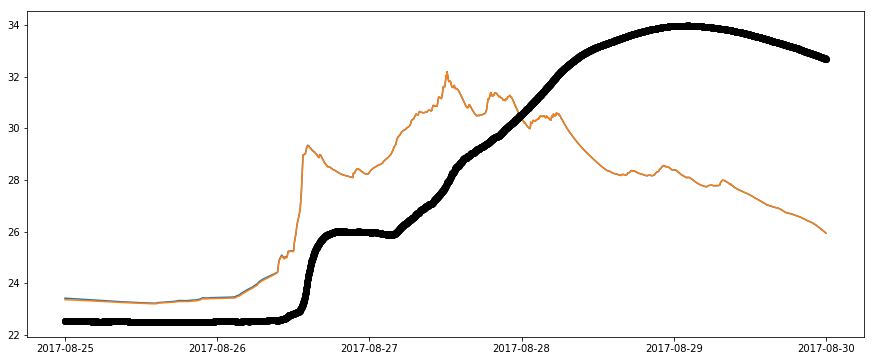

In [16]:
fig= plt.figure(figsize=(15,6))
plt.plot(period, df.sim_H_couple.loc[period], label='Coupled')
plt.plot(period, df.sim_H_nocouple.loc[period], label='non-Coupled')
plt.plot(period, df.obs_H.loc[period],'o',color='k', label='Observation')

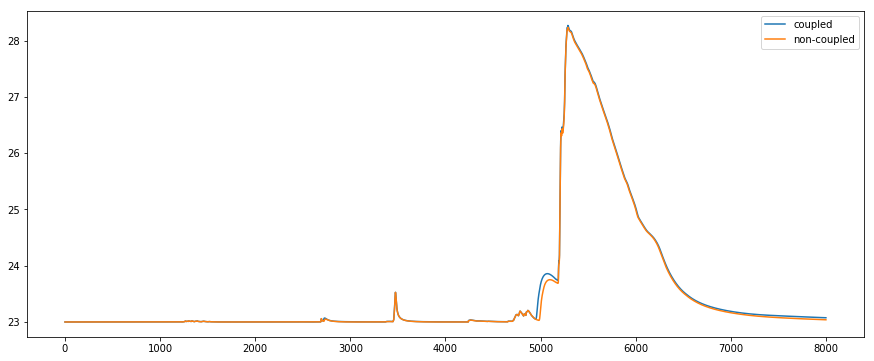

In [54]:
plt.figure(figsize=(15,6))
plt.plot(coupledSplotter.stage[:8000,gauge1_iloc], label='coupled')
plt.plot(nonCoupledSplotter.stage[:8000,gauge1_iloc], label='non-coupled')
plt.legend();

<Figure size 1080x432 with 0 Axes>

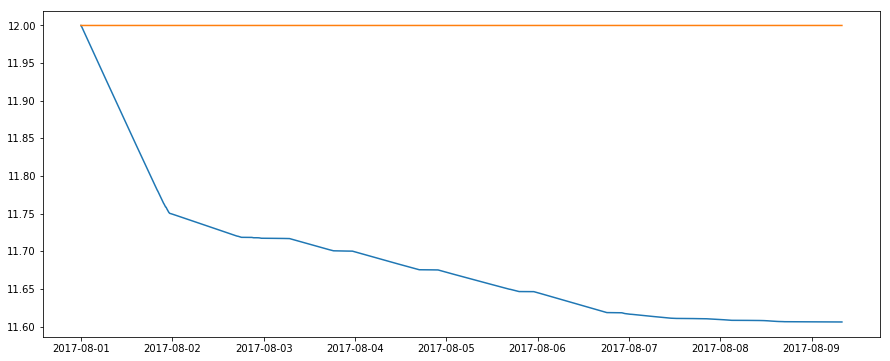

In [65]:
plt.figure(figsize=(15,6))
plt.plot(dr[:6000], coupledSplotter.SM[:6000,300]*1000)
plt.plot(dr[:6000],nonCoupledSplotter.SM[:6000,200]*1000)

<Figure size 1080x432 with 0 Axes>

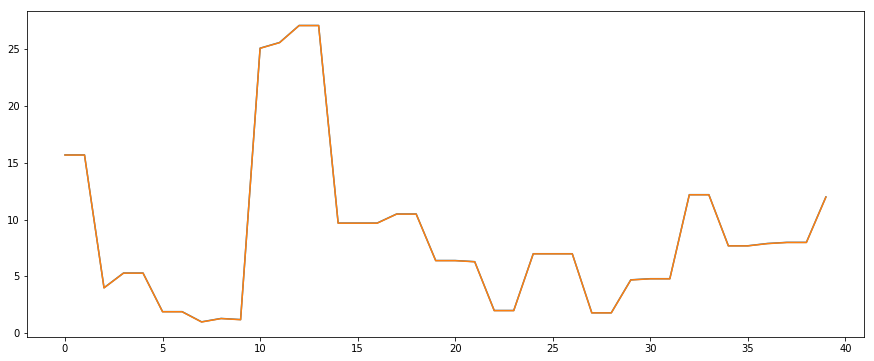

In [58]:
plt.figure(figsize=(15,6))
plt.plot(coupledSplotter.exc_rain[5130:5170,2800]*120*1000)
plt.plot(nonCoupledSplotter.exc_rain[5130:5170,2800]*120*1000)

In [20]:
df.corr()

,sim_H_couple,sim_V_couple,sim_H_nocouple,sim_V_nocouple,obs_H,obs_Q
sim_H_couple,1.000000,0.997922,0.999701,0.997526,0.712908,0.595068
sim_V_couple,0.997922,1.000000,0.997835,0.999799,0.695182,0.571917
sim_H_nocouple,0.999701,0.997835,1.000000,0.997919,0.715140,0.597160
sim_V_nocouple,0.997526,0.999799,0.997919,1.000000,0.696954,0.573763
obs_H,0.712908,0.695182,0.715140,0.696954,1.000000,0.920119
obs_Q,0.595068,0.571917,0.597160,0.573763,0.920119,1.000000


In [19]:
coupledSplotter.stage[:,gauge1_iloc]

array([23.      , 23.      , 23.      , ..., 23.149231, 23.149057,
       23.148884], dtype=float32)

In [18]:
nonCoupledSplotter.stage[:,gauge1_iloc]

array([23.      , 23.      , 23.      , ..., 23.127573, 23.127369,
       23.127165], dtype=float32)